# Flight Fare Prediction Model

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Dataset
# Since the data is in excel form, we have to use read_excel to load the data

train_data = pd.read_excel('Data_Train.xlsx')

In [3]:
#Checking the columns of dataset

train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
#Checking what kind of values are there in each column

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
#Checking if there is any null values

train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
# dropping the two rows with null values

train_data.dropna(inplace=True)

In [7]:
#verifying if there is any null value left in the dataset

train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
#shape of the training data

train_data.shape

(10682, 11)

## Exploratory Data Analysis

In [9]:
#Replacing Banglore with Bangalore

train_data['Source'] = train_data['Source'].replace('Banglore', 'Bangalore')
train_data['Destination'] = train_data['Destination'].replace('Banglore', 'Bangalore')

In [10]:
#Converting the date to date time and extracting the day from it
train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey'], format= '%d/%m/%Y').dt.day

#Converting the date to date time and extracting the month from it
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'], format= '%d/%m/%Y').dt.month

In [11]:
#since we've converted the Date_of_journey to datetime, we can drop the column

del train_data['Date_of_Journey']

In [12]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Bangalore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Bangalore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Bangalore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Bangalore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [13]:
# We can convert departure time into datetime integer as it is as an object datatype now

#Extracting the hour from the time
train_data['Dep_Hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour

#Extracting the hour from the time
train_data['Dep_Minute'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

/var/folders/4k/vcng4p5x36xd8ltn2w5s1c5c0000gn/T/ipykernel_46261/1977391633.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Dep_Hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour
/var/folders/4k/vcng4p5x36xd8ltn2w5s1c5c0000gn/T/ipykernel_46261/1977391633.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Dep_Minute'] = pd.to_datetime(train_data['Dep_Time']).dt.minute


In [14]:
#The Dep_Time column is no longer needed, so we can drop it

train_data.drop(['Dep_Time'], axis=1, inplace=True)

In [15]:
# We can convert arrival time into datetime integer as it is as an object datatype now

#Extracting the hour from the time
train_data['Arrival_Hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour

#Extracting the minute from the time
train_data['Arrival_Minute'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

/var/folders/4k/vcng4p5x36xd8ltn2w5s1c5c0000gn/T/ipykernel_46261/2776798648.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Arrival_Hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour
/var/folders/4k/vcng4p5x36xd8ltn2w5s1c5c0000gn/T/ipykernel_46261/2776798648.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Arrival_Minute'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute


In [16]:
#The Arrival_Time column is no longer needed, so we can drop it

train_data.drop(['Arrival_Time'], axis=1, inplace=True)

In [17]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Bangalore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Bangalore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Bangalore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Bangalore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [18]:
# Converting duration column into hours and minutes

#Assigning and converting 'Duration' column into a list :
duration = list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:   #checks if only hour or minutes column is there
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'  #converts and adds 0 minutes
        else:
            duration[i] = '0h ' + duration[i]
    else:
        pass

duration_hours = []
duration_minutes = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))  #Extracts hour as integer
    duration_minutes.append(int(duration[i].split(sep='m')[0].split()[-1]))  #Extracts mins from duration

In [19]:
train_data['Duration_Hours'] = duration_hours
train_data['Duration_Minutes'] = duration_minutes

In [20]:
# Dropping 'Duration' column:
del train_data['Duration']

In [21]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,Bangalore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Bangalore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Bangalore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Bangalore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [22]:
train_data.drop(['Additional_Info', 'Route'], axis = 1, inplace=True)
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,Bangalore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Bangalore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Bangalore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Bangalore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [23]:
train_data.to_csv('train_data_processed.csv', index=False)

## Handling Categorical Data

* Nominal data -> No order in data -> OneHotEncoder
* Ordinal data -> Data are ordered -> LabelEncoder

In [24]:
# Airline is nominal data as it is not ordered
# We'll use OneHotEncoder for this

Airline = train_data[['Airline']]
Airline = pd.get_dummies(Airline)
Airline.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False


In [25]:
# Source is nominal data as it is not ordered
# We'll use OneHotEncoder for this

source = train_data[['Source']]
Source = pd.get_dummies(source)
Source.head()

,Source_Bangalore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,True,False,False,False,False
1,False,False,False,True,False
2,False,False,True,False,False
3,False,False,False,True,False
4,True,False,False,False,False


In [26]:
# destination is nominal categorical data, we will perform OneHotEncoding

destination = train_data[['Destination']]
Destination = pd.get_dummies(destination)
Destination.head()

,Destination_Bangalore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,False,True
1,True,False,False,False,False,False
2,False,True,False,False,False,False
3,True,False,False,False,False,False
4,False,False,False,False,False,True


In [27]:
train_data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [28]:
# Total Stops is a ordinal categorical data
# We apply Label Encoder to it
# We assign values with corresponding keys

train_data.replace({'non-stop':0, '1 stop': 1, '2 stops': 2, '3 stops' : 3, '4 stops' : 4}, inplace=True)

In [29]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,Bangalore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Bangalore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Bangalore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Bangalore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [30]:
# Drop the Airline, Source, Destionation table
train_data.drop(['Airline', 'Source', 'Destination'],axis=1, inplace=True)

In [31]:
#Add the OneHotEncoded Tables
train_data = pd.concat([train_data, Airline, Source, Destination], axis=1)

In [32]:
train_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Bangalore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,...,False,False,True,False,True,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,...,False,True,False,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,...,False,False,True,False,True,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,...,False,False,False,False,False,False,False,False,False,True


In [33]:
train_data.shape

(10682, 33)

# Test set

In [34]:
test_data = pd.read_excel('Test_set.xlsx')

In [35]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [36]:
# Preprocessing

print('Test data Info')
print('-'*75)
print(test_data.info())

print('-'*75)

print('Null values :')
print('-'*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data[["Airline"]])

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data[["Source"]])

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data[["Destination"]])

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


test_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
test_data = pd.concat([test_data, Airline, Source, Destination], axis = 1)


print()
print()

print("Shape of test data : ", test_data.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None
---------------------------------------------------------------------------
Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source

/var/folders/4k/vcng4p5x36xd8ltn2w5s1c5c0000gn/T/ipykernel_46261/3465491971.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
/var/folders/4k/vcng4p5x36xd8ltn2w5s1c5c0000gn/T/ipykernel_46261/3465491971.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
/var/folders/4k/vcng4p5x36xd8ltn2w5s1c5c0000gn/T/ipykernel_46261/3465491971.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Arrival_hour"] = pd.to_datetime(test_data

In [37]:
test_data.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,False,...,False,True,False,False,False,True,False,False,False,False
1,1,12,5,6,20,10,20,4,0,False,...,False,False,True,False,True,False,False,False,False,False
2,1,21,5,19,15,19,0,23,45,False,...,False,True,False,False,False,True,False,False,False,False
3,1,21,5,8,0,21,0,13,0,False,...,False,True,False,False,False,True,False,False,False,False
4,0,24,6,23,55,2,45,2,50,True,...,False,False,False,False,False,False,True,False,False,False


# Feature Selection

### Finding out the best feature which will contribute and have good relation with target variable.

#### Some of the selection methods are :
* Heatmap
* Feature Importance
* Select K Boost

In [38]:
train_data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_Hour',
       'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hours',
       'Duration_Minutes', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Bangalore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Bangalore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [39]:
X = train_data.drop(['Price'], axis = 1)
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Bangalore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,5,5,50,13,15,7,25,False,...,False,False,True,False,True,False,False,False,False,False
2,2,9,6,9,25,4,25,19,0,False,...,False,True,False,False,False,True,False,False,False,False
3,1,12,5,18,5,23,30,5,25,False,...,False,False,True,False,True,False,False,False,False,False
4,1,1,3,16,50,21,35,4,45,False,...,False,False,False,False,False,False,False,False,False,True


In [40]:
y = train_data['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

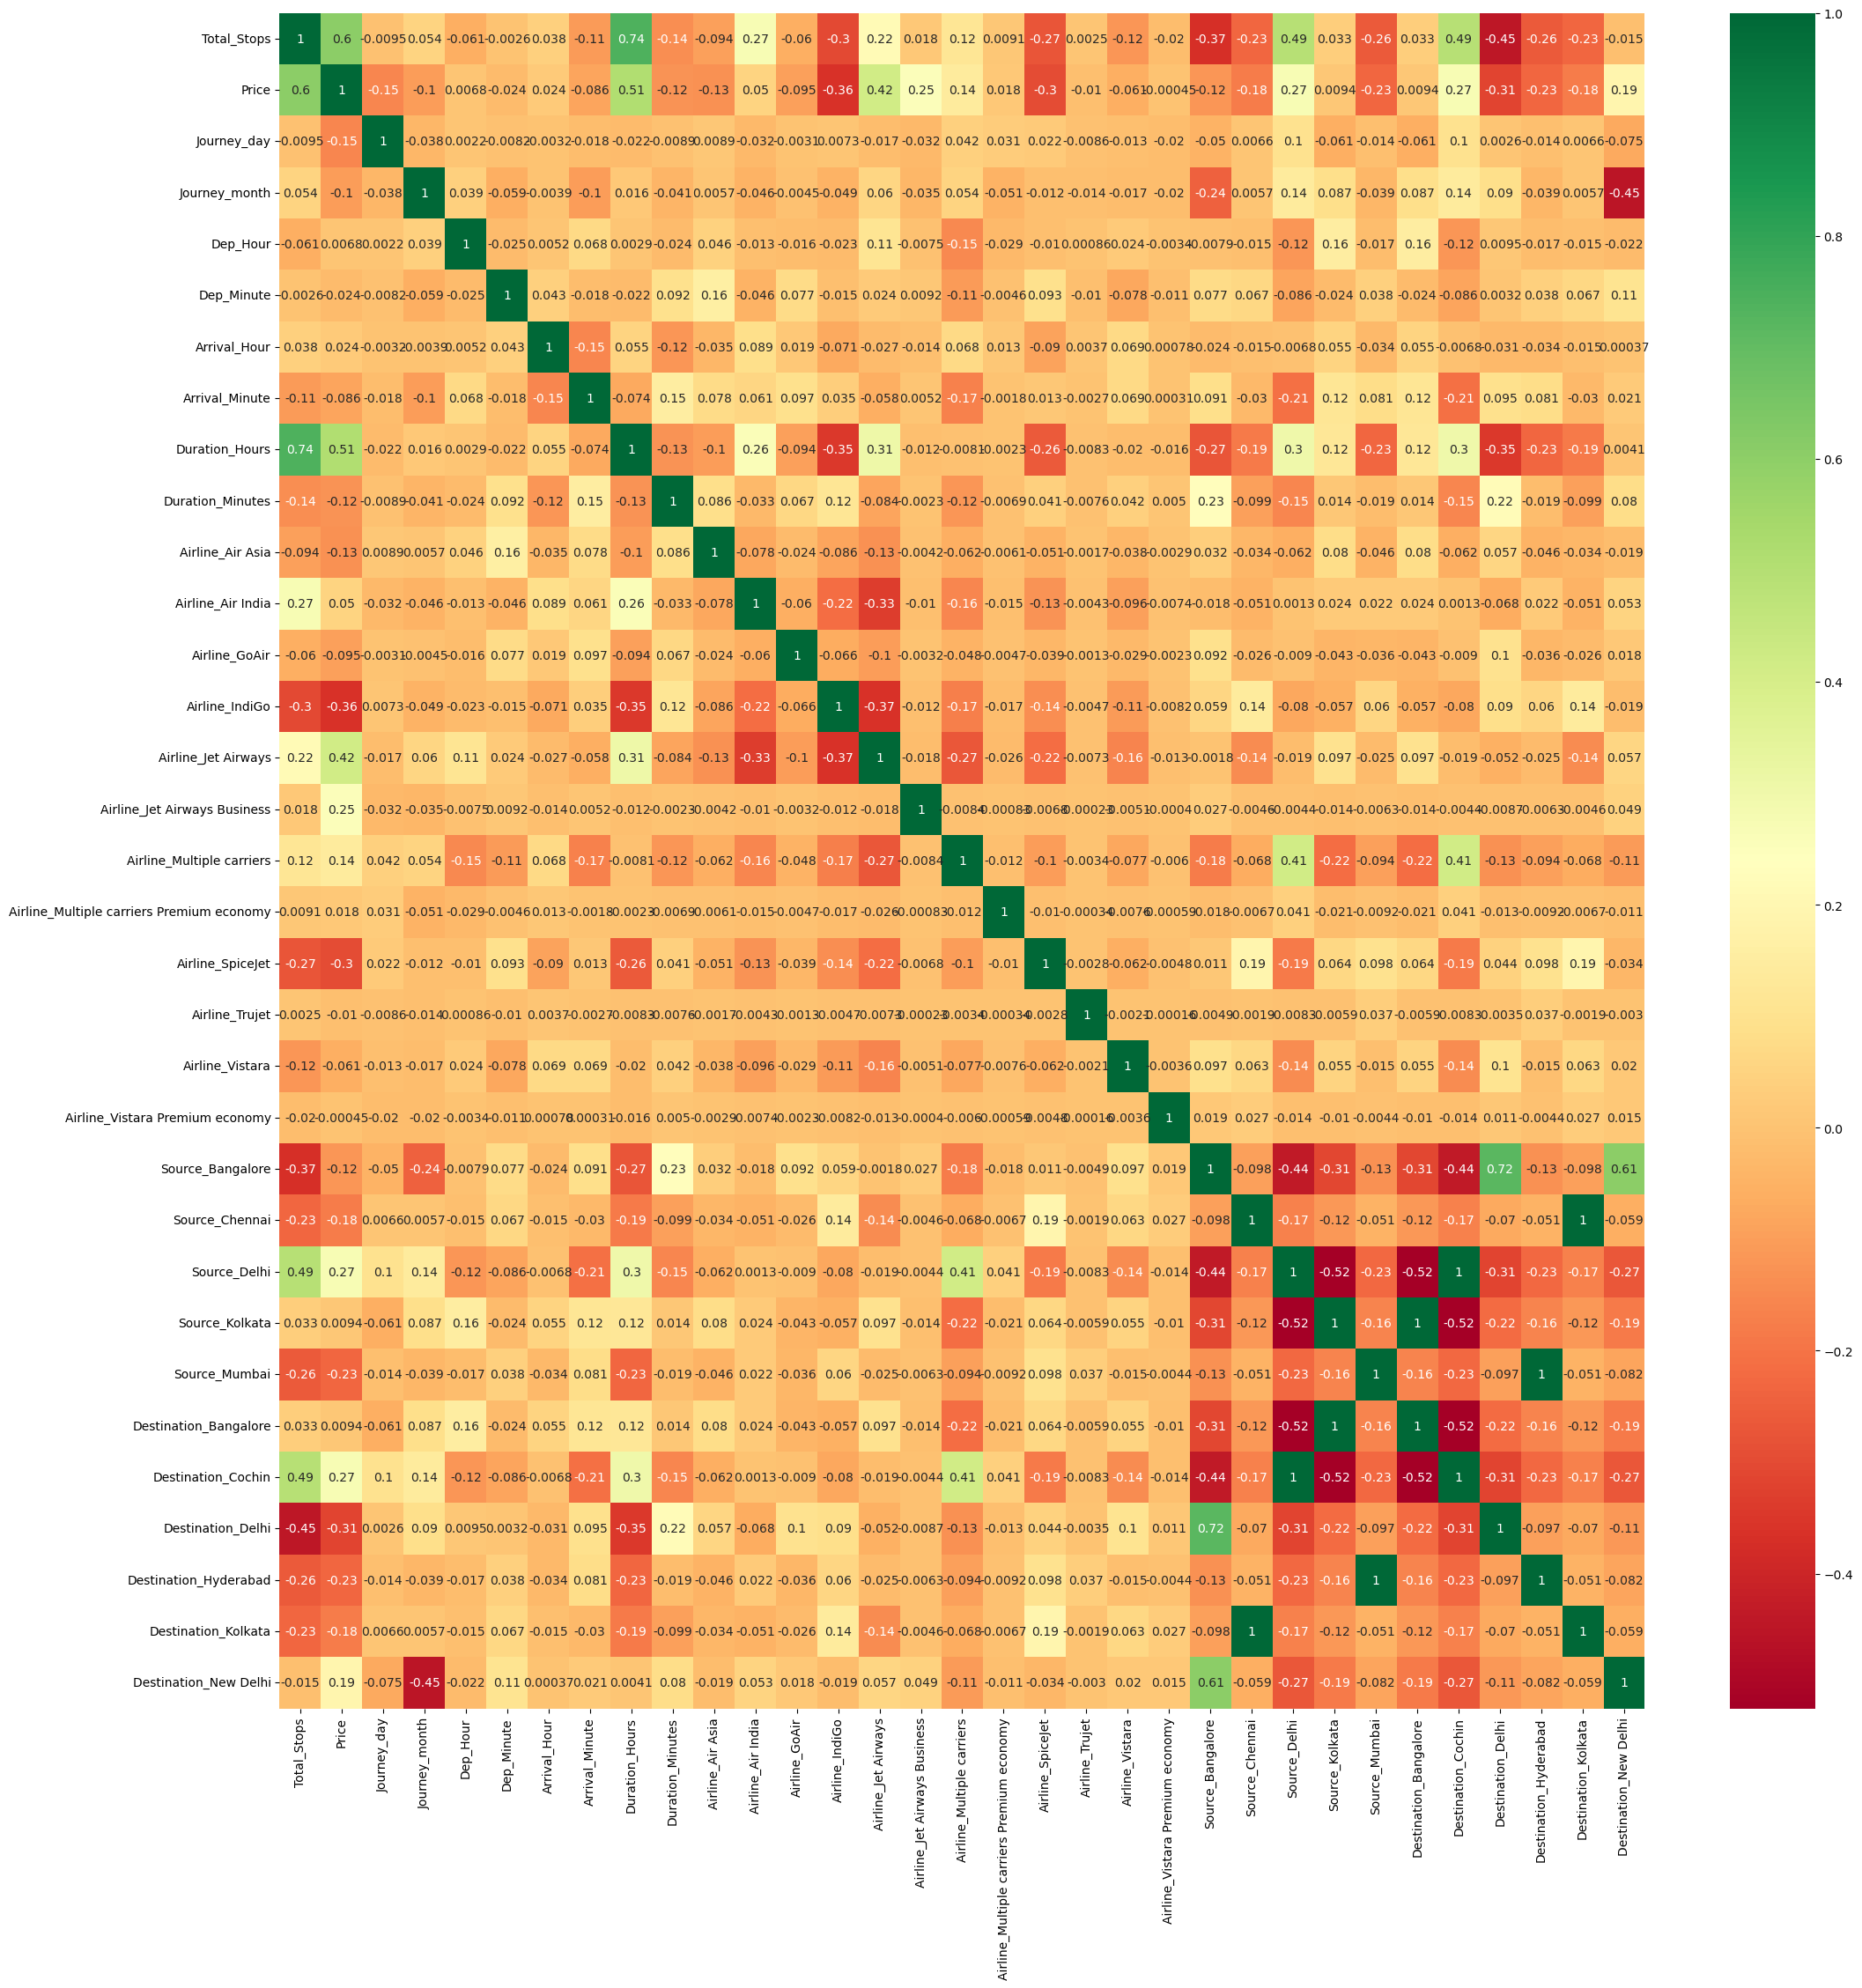

In [41]:
# Find correlation between independent and dependent attributes

plt.figure(figsize=(25,25))
sns.heatmap(train_data.corr(), annot=True, cmap= "RdYlGn")

plt.show()

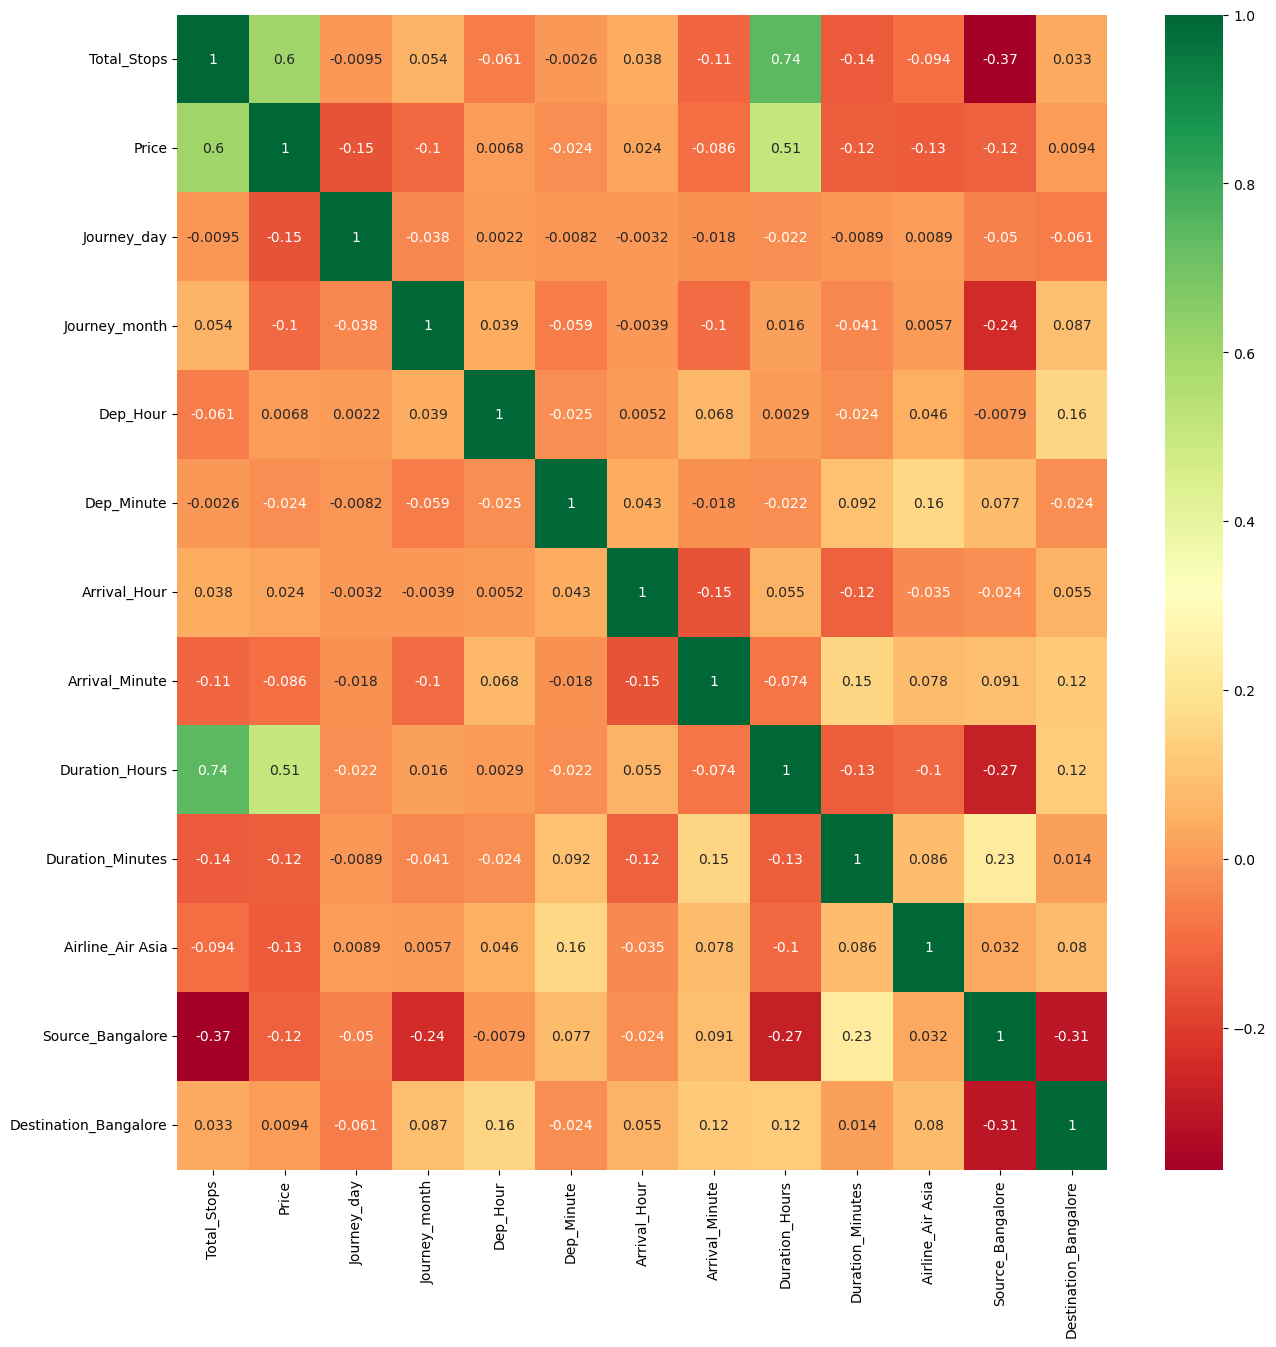

In [42]:
plt.figure(figsize=(15,15))
sns.heatmap(train_data.drop(['Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'], axis=1).corr(), annot=True, cmap= "RdYlGn")

plt.show()

In [43]:
# Important features using ExtraTreeRegressor

from sklearn.tree import ExtraTreeRegressor
model1 = ExtraTreeRegressor()
model1.fit(X,y)

ExtraTreeRegressor()

In [44]:
print(model1.feature_importances_)

[5.58566368e-02 1.36312653e-01 6.25935314e-02 2.23413432e-02
 2.14309550e-02 2.53477785e-02 2.15054373e-02 2.14920237e-01
 1.76067110e-02 2.78040000e-03 1.15324743e-02 1.57412394e-03
 2.13428975e-02 1.79754258e-01 7.26101796e-02 8.22941702e-03
 1.05307539e-03 3.01494748e-03 0.00000000e+00 2.39970651e-03
 1.11573194e-04 6.30932796e-04 6.96864878e-05 7.39108151e-02
 8.84239728e-04 4.03074903e-03 3.11252539e-03 8.87085854e-04
 6.73917166e-04 6.23121927e-03 8.99678789e-04 2.63508139e-02]


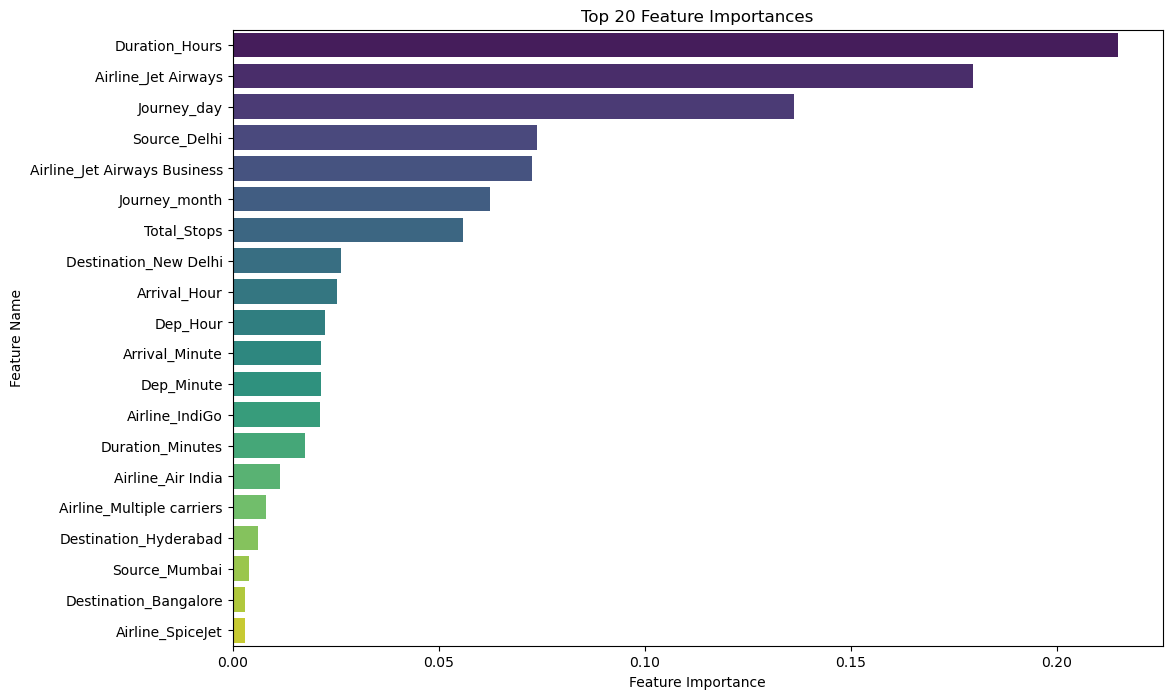

In [45]:
#plot graph of feature importances for better visualization

plt.figure(figsize=(12, 8))

feat_importances = pd.Series(model1.feature_importances_, index=X.columns)
top_features = feat_importances.nlargest(20)

sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title('Top 20 Feature Importances')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.show()

## Fitting model using Random Forest

* Split dataset into train and test set
* Import model
* Fit data
* Check RMSE score
* Plot Graph

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 44)

In [47]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [48]:
y_pred = model.predict(X_test)

In [49]:
model.score(X_train, y_train)

0.9511973375765439

In [50]:
model.score(X_test, y_test)

0.8414672232305606

/var/folders/4k/vcng4p5x36xd8ltn2w5s1c5c0000gn/T/ipykernel_46261/1759252930.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


<function matplotlib.pyplot.show(close=None, block=None)>

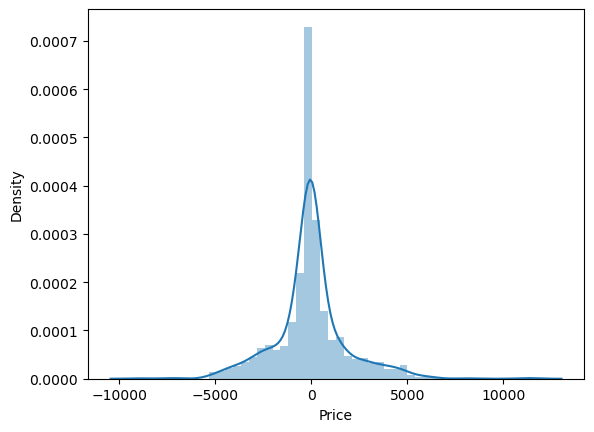

In [51]:
sns.distplot(y_test-y_pred)
plt.show

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [53]:
print('MAE is :', mean_absolute_error(y_test, y_pred))

MAE is : 1188.9744100017278


In [54]:
print('MSE is :', mean_squared_error(y_test, y_pred))
print('RMSE is :', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE is : 3583936.2575108423
RMSE is : 1893.1286954432978


In [55]:
print('R2 score is :', r2_score(y_test, y_pred))

R2 score is : 0.8414672232305606


## Hyperparameter tuning:

* RandomizedSearchCV
* GridSearchCV

In [56]:
from sklearn.model_selection import RandomizedSearchCV

In [57]:
# Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [58]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [59]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
model_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [60]:
model_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

/Users/ritochak7/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ritochak7/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ritochak7/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/ritochak7/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [61]:
model_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [62]:
prediction = model_random.predict(X_test)

/var/folders/4k/vcng4p5x36xd8ltn2w5s1c5c0000gn/T/ipykernel_46261/375150797.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


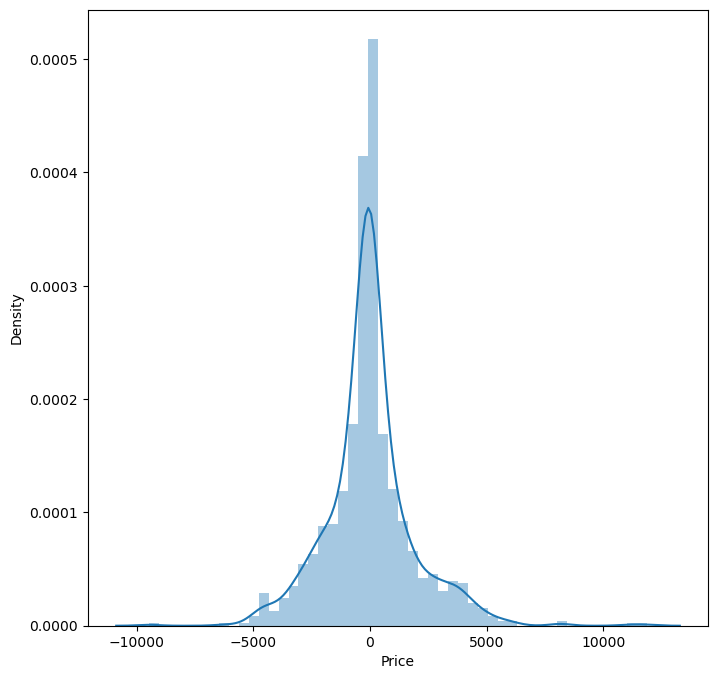

In [63]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

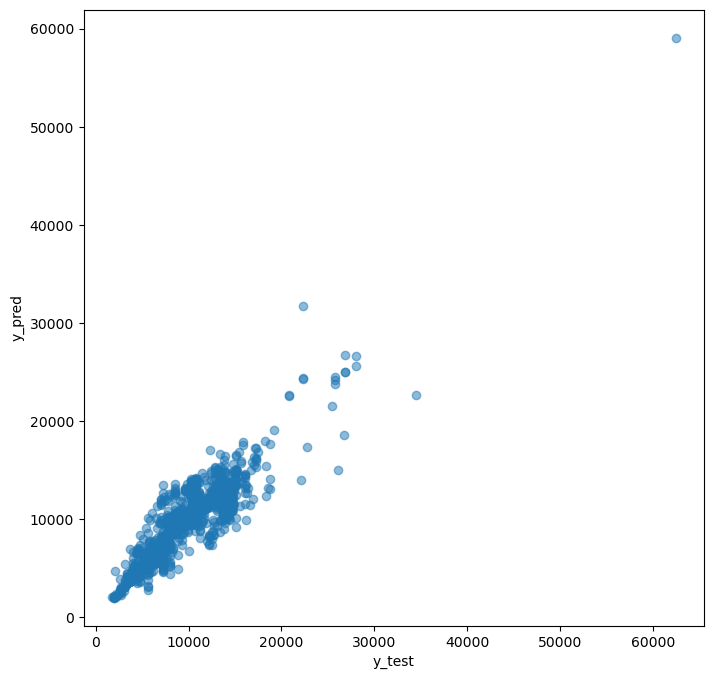

In [64]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [65]:
print('MAE is :', mean_absolute_error(y_test, prediction))
print('MSE is :', mean_squared_error(y_test, prediction))
print('RMSE is :', np.sqrt(mean_squared_error(y_test, prediction)))

MAE is : 1251.74834087226
MSE is : 3595022.8478729725
RMSE is : 1896.0545477050423


In [66]:
print('R2 score is :', r2_score(y_test, prediction))

R2 score is : 0.8409768160835778


# Save the model to reuse it again


In [67]:
import pickle
# open a file, where you want to store the data
file = open('flight_model.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)
file.close()